PARTA

In [2]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('/Users/liu/Desktop/dataset_lm.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dependent Var        422 non-null    float64
 1   Explanatory Var #1   422 non-null    float64
 2   Explanatory Var #2   422 non-null    float64
 3   Explanatory Var #3   422 non-null    int64  
 4   Explanatory Var #4   422 non-null    float64
 5   Explanatory Var #5   422 non-null    float64
 6   Explanatory Var #6   422 non-null    float64
 7   Explanatory Var #7   422 non-null    float64
 8   Explanatory Var #8   422 non-null    int64  
 9   Explanatory Var #9   422 non-null    float64
 10  Explanatory Var #10  422 non-null    float64
 11  Explanatory Var #11  422 non-null    float64
 12  Explanatory Var #12  422 non-null    float64
 13  Explanatory Var #13  422 non-null    int64  
 14  Explanatory Var #14  422 non-null    float64
 15  Explanatory Var #15  422 non-null    flo

In [5]:
y = df['Dependent Var']
x = df.drop('Dependent Var', axis = 1)
x = sm.add_constant(x)

In [6]:
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Dependent Var   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.458e+30
Date:                Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                        10:54:49   Log-Likelihood:                 11991.
No. Observations:                 422   AIC:                        -2.395e+04
Df Residuals:                     406   BIC:                        -2.389e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  32.0000   9

PARTB

In [7]:
r = model.resid
std = np.std(r)
for i in range(1,4):
    autocorrelations = r.autocorr(lag=i)
    print(autocorrelations)

0.08761230519874948
-0.0006909361541353932
0.008050247268124382


In [8]:
gls_model = sm.GLS(y, x).fit()
print(gls_model.summary())

                            GLS Regression Results                            
Dep. Variable:          Dependent Var   R-squared:                       1.000
Model:                            GLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.458e+30
Date:                Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                        10:54:49   Log-Likelihood:                 11991.
No. Observations:                 422   AIC:                        -2.395e+04
Df Residuals:                     406   BIC:                        -2.389e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  32.0000   9

PARTC

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state=0)

In [10]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)

Lasso(alpha=1)

In [11]:
from sklearn.metrics import mean_absolute_percentage_error

prediction = lasso.predict(x_test)
mae = mean_absolute_percentage_error(y_test, prediction)
mae = mae * 100
print(mae)

3.947673796221203


In [12]:
from sklearn.model_selection import GridSearchCV
parameters = {'alpha': np.linspace(0.1, 10, 100)}
lasso = Lasso()
grid = GridSearchCV(lasso, parameters, scoring='neg_mean_absolute_error')
grid.fit(x,y)

#Optimal alpha
print(f'Optimal alpha: {grid.best_params_}')

Optimal alpha: {'alpha': 0.1}


PART D

In [13]:
data = {
    'Month' : list(range(1,26)),
    'Demand' : [100,112,107,102,91,85,84,85,79,81,134,86,99,89,
                111,114,118, 163, 193,143,144,202,158,160,144],
    'Advanced_Demand' : [71,30,75,64,41,51,42,51,57,49,134,
                         52,99,56,81,79,73,163,193,99,91,202,105,101,96]
}

df1 = pd.DataFrame(data)

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Month            25 non-null     int64
 1   Demand           25 non-null     int64
 2   Advanced_Demand  25 non-null     int64
dtypes: int64(3)
memory usage: 728.0 bytes


In [15]:
df1

,Month,Demand,Advanced_Demand
0,1,100,71
1,2,112,30
2,3,107,75
3,4,102,64
4,5,91,41
5,6,85,51
6,7,84,42
7,8,85,51
8,9,79,57
9,10,81,49


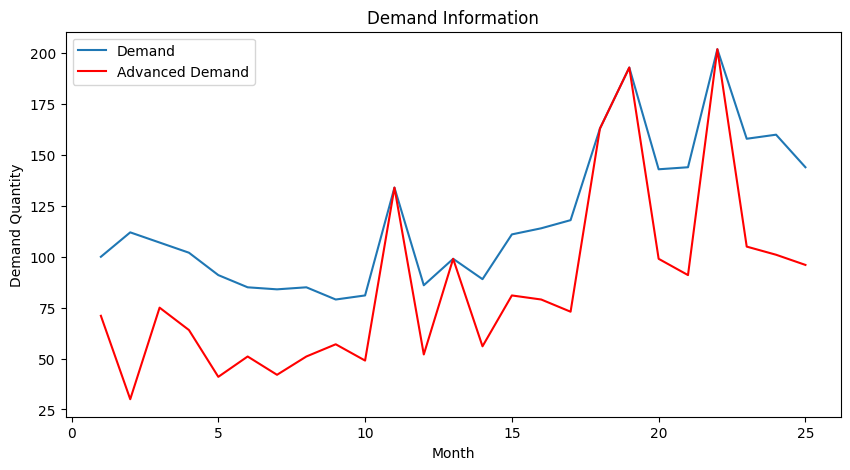

In [16]:
import matplotlib.pyplot as plt
# plot the demand
plt.figure(figsize=(10,5))
plt.plot(df1['Month'], df1['Demand'], '-', label='Demand')
plt.plot(df1['Month'], df1['Advanced_Demand'], '-', label='Advanced Demand', color='r')
plt.title('Demand Information')
plt.xlabel('Month')
plt.ylabel('Demand Quantity')
plt.legend()
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression
y1 = df1['Demand'][1:]
x1 = df1['Demand'][:-1].values.reshape(-1,1) #1D to 2D 
l = np.array(df1['Advanced_Demand'][1:])

x1_train, x1_test, y1_train, y1_test, l_train, l_test = train_test_split(x1, y1, l, test_size = 0.2, random_state=42)

#Building Regression Model
ols_model = LinearRegression()
ols_model.fit(x1_train,y1_train)
#Grabing beta value
ols_beta = ols_model.coef_
print(ols_beta)

[0.80916288]


In [18]:
ols_predictions = ols_model.predict(x1_test)
ols_predictions

array([ 87.82151182, 119.37886404, 104.81393225, 180.06607983,
        93.48565196])

In [19]:
#Evaluating ols model
from sklearn.metrics import mean_squared_error
mse_ols = mean_squared_error(y1_test, ols_predictions)
print('MSE for OLS is ', mse_ols)

MSE for OLS is  681.0556809106661


In [20]:
#Based on L value and the condition X*beta >= L, adjust OLS model
adjusted_ols = np.maximum(ols_predictions, l_test)
adjusted_mse_ols = mean_squared_error(y1_test, adjusted_ols)
print('Adjusted MSE for OLS is ', adjusted_mse_ols)

Adjusted MSE for OLS is  294.4133735132249


In [21]:
#Ridge Model
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

#Define lambdas value
alphas = np.logspace(-10,10,21)

#Looking for the best value of lambda by Cross validation
ridge_cv = RidgeCV(alphas = alphas, store_cv_values=True)
ridge_cv.fit(x1_train,y1_train)

best_lambda = ridge_cv.alpha_
best_lambda


1000.0

In [22]:
ridge_model = Ridge(alpha = best_lambda)
ridge_model.fit(x1_train, y1_train)

ridge_beta = ridge_model.coef_
ridge_beta

array([0.77253015])

In [23]:
ridge_predictions = ridge_model.predict(x1_test)
ridge_predictions

array([ 89.29260488, 119.42128087, 105.51573811, 177.36104241,
        94.70031595])

In [24]:
#Evaluating Ridge model
mse_ridge = mean_squared_error(y1_test, ridge_predictions)
print('MSE for Ridge is ', mse_ols)

MSE for Ridge is  681.0556809106661


In [25]:
#Based on L value and the condition X*beta >= L, adjust OLS model
adjusted_ridge = np.maximum(ridge_predictions, l_test)
adjusted_mse_ridge = mean_squared_error(y1_test, adjusted_ridge)
print('Adjusted MSE for Ridge is ', adjusted_mse_ridge)

Adjusted MSE for Ridge is  258.2988366670621


In [26]:
#Lasso Model
from sklearn.linear_model import LassoCV

#Define lambdas value
alphas = np.logspace(-10,10,21)

#Looking for the best value of lambda by Cross validation
lasso_cv = LassoCV(alphas = alphas)
lasso_cv.fit(x1_train,y1_train)

best_lambda_lasso = lasso_cv.alpha_
best_lambda_lasso

100.0

In [27]:
lasso_model = Lasso(alpha = best_lambda_lasso)
lasso_model.fit(x1_train, y1_train)

#Grathering beta value
lasso_beta = lasso_model.coef_
lasso_beta

array([0.71906649])

In [28]:
lasso_predictions = lasso_model.predict(x1_test)
lasso_predictions

array([ 91.43959299, 119.48318617, 106.53998932, 173.41317304,
        96.47305844])

In [29]:
#Evaluating Lasso Model
mse_lasso = mean_squared_error(y1_test, lasso_predictions)
print('MSE for Lasso is ', mse_lasso)

MSE for Lasso is  592.7712865359256


In [30]:
adjusted_lasso = np.maximum(lasso_predictions, l_test)
adjusted_mse_lasso = mean_squared_error(y1_test, adjusted_lasso)
print('Adjusted MSE for Lasso is ', adjusted_mse_lasso)

Adjusted MSE for Lasso is  212.75158257668642
